In [1]:
import requests

In [6]:
from tkinter import *
from tkinter import filedialog
import pandas as pd

def get_directory():
    root = Tk()
    path = filedialog.askdirectory(title="Choose path to spotify data folder")
    root.destroy()
    return path

def createDF():
    path = get_directory()+"/"
    # df1 = pd.read_json(path+"/StreamingHistory0.json", encoding='utf-8')
    # df2 = pd.read_json(path+"/StreamingHistory1.json", encoding='utf-8')
    # df3 = pd.read_json(path+"/StreamingHistory2.json", encoding='utf-8')
    # df4 = pd.read_json(path+"/StreamingHistory3.json", encoding='utf-8')
    df5 = pd.read_json(path+"/StreamingHistory3.json", encoding='utf-8')
    stream_df = pd.concat([df5], ignore_index=True)

    return stream_df

In [2]:
def getAccessToken():
    auth_url = 'https://accounts.spotify.com/api/token'
    clientID = "204d99eaea4044d08a4d5c06444cb58a"
    clientSecret = "ac11837bbd6e410da35bcbd3a1b05a7c"

    data = {
        'grant_type': 'client_credentials',
        'client_id': clientID,
        'client_secret': clientSecret,
    }

    auth_response = requests.post(auth_url, data = data)
    access_token = auth_response.json().get('access_token')
    return access_token

In [3]:
def getAudioID(name):
  endpoint = "https://api.spotify.com/v1/search?q=track:" + name + "&type=track"

  headers = {
        'Authorization': 'Bearer {}'.format(getAccessToken())
    }

  response = requests.get(endpoint, headers = headers)
  if len(response.json().get('tracks').get('items')) != 0 and response.json() is not None:
    return response.json().get('tracks').get('items')[0].get('id')
  else:
    return 'noIDfound'
  # print(response.json())

getAudioID("The Hills")

'7fBv7CLKzipRk6EC6TWHOB'

In [4]:
def getAudioFeatures(id):
  endpoint = "https://api.spotify.com/v1/audio-features/" + id

  headers = {
        'Authorization': 'Bearer {}'.format(getAccessToken())
    }

  response = requests.get(endpoint, headers = headers)

  return response.json()

getAudioFeatures('7fBv7CLKzipRk6EC6TWHOB')

{'danceability': 0.585,
 'energy': 0.564,
 'key': 0,
 'loudness': -7.063,
 'mode': 0,
 'speechiness': 0.0515,
 'acousticness': 0.0671,
 'instrumentalness': 0,
 'liveness': 0.135,
 'valence': 0.137,
 'tempo': 113.003,
 'type': 'audio_features',
 'id': '7fBv7CLKzipRk6EC6TWHOB',
 'uri': 'spotify:track:7fBv7CLKzipRk6EC6TWHOB',
 'track_href': 'https://api.spotify.com/v1/tracks/7fBv7CLKzipRk6EC6TWHOB',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7fBv7CLKzipRk6EC6TWHOB',
 'duration_ms': 242253,
 'time_signature': 4}

In [12]:
# df1 = pd.read_json("StreamingHistory0.json", encoding='utf-8')
# df2 = pd.read_json("StreamingHistory1.json", encoding='utf-8')
# df3 = pd.read_json("StreamingHistory2.json", encoding='utf-8')
# df4 = pd.read_json("StreamingHistory3.json", encoding='utf-8')
df5 = pd.read_json("StreamingHistory4.json", encoding='utf-8')
df = pd.concat([df5], ignore_index=True)
df.head()

,endTime,artistName,trackName,msPlayed
0,2022-02-08 19:42,The Weeknd,The Morning,312426
1,2022-02-08 19:45,The Weeknd,Sacrifice,188918
2,2022-02-08 19:50,The Weeknd,Faith,283226
3,2022-02-08 19:55,The Weeknd,Wicked Games,323746
4,2022-02-08 20:00,Lana Del Rey,Lust For Life (with The Weeknd),264066


In [ ]:
# tracks = df['trackName'].tolist()
# ids = list(map(getAudioID, tracks[0:500]))
# print(ids)

In [ ]:
tracks = df['trackName'].tolist()
audioFeatures = list(map(getAudioFeatures, list(map(getAudioID, tracks[0:500]))))
print(audioFeatures)

In [16]:
acousticness = []
danceability = []
liveness = []
loudness = []
speechiness = []
valence = []
tempo = []

for i in audioFeatures:
  acousticness.append(i.get('acousticness'))
  danceability.append(i.get('danceability'))
  liveness.append(i.get('liveness'))
  loudness.append(i.get('loudness'))
  speechiness.append(i.get('speechiness'))
  valence.append(i.get('valence'))
  tempo.append(i.get('tempo'))

songs = pd.DataFrame(list(zip(tracks, acousticness, danceability, liveness, loudness, speechiness, valence, tempo)), columns=['Song', 'Acousticness', 'Danceability', 'Liveness', 'Loudness', 'Speechiness', 'Valence', 'Tempo'])
songs.head()

,Song,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence,Tempo
0,The Morning,0.31700,0.652,0.1040,-7.555,0.0390,0.186,120.073
1,Sacrifice,0.02960,0.735,0.0678,-6.523,0.1130,0.905,122.000
2,Faith,0.09790,0.202,0.1090,-5.212,0.0324,0.252,85.040
3,Wicked Games,0.00959,0.658,0.3250,-5.197,0.0309,0.326,114.078
4,Lust For Life (with The Weeknd),0.60400,0.504,0.3640,-8.644,0.0542,0.262,99.982


In [17]:
from sklearn import preprocessing
import numpy

arrl = numpy.array(loudness)
arrt = numpy.array(tempo)
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(arrl.reshape(-1,1))
tempo_scaled = min_max_scaler.fit_transform(arrt.reshape(-1,1))
songs['Loudness'] = pd.DataFrame(loudness_scaled)
songs['Tempo'] = pd.DataFrame(tempo_scaled)
songs.dropna(inplace=True)
songs.head()

,Song,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence,Tempo
0,The Morning,0.31700,0.652,0.1040,0.790909,0.0390,0.186,0.428750
1,Sacrifice,0.02960,0.735,0.0678,0.821569,0.1130,0.905,0.441849
2,Faith,0.09790,0.202,0.1090,0.860517,0.0324,0.252,0.190618
3,Wicked Games,0.00959,0.658,0.3250,0.860963,0.0309,0.326,0.388000
4,Lust For Life (with The Weeknd),0.60400,0.504,0.3640,0.758556,0.0542,0.262,0.292184


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5f2012d50>,
      dtype=object)

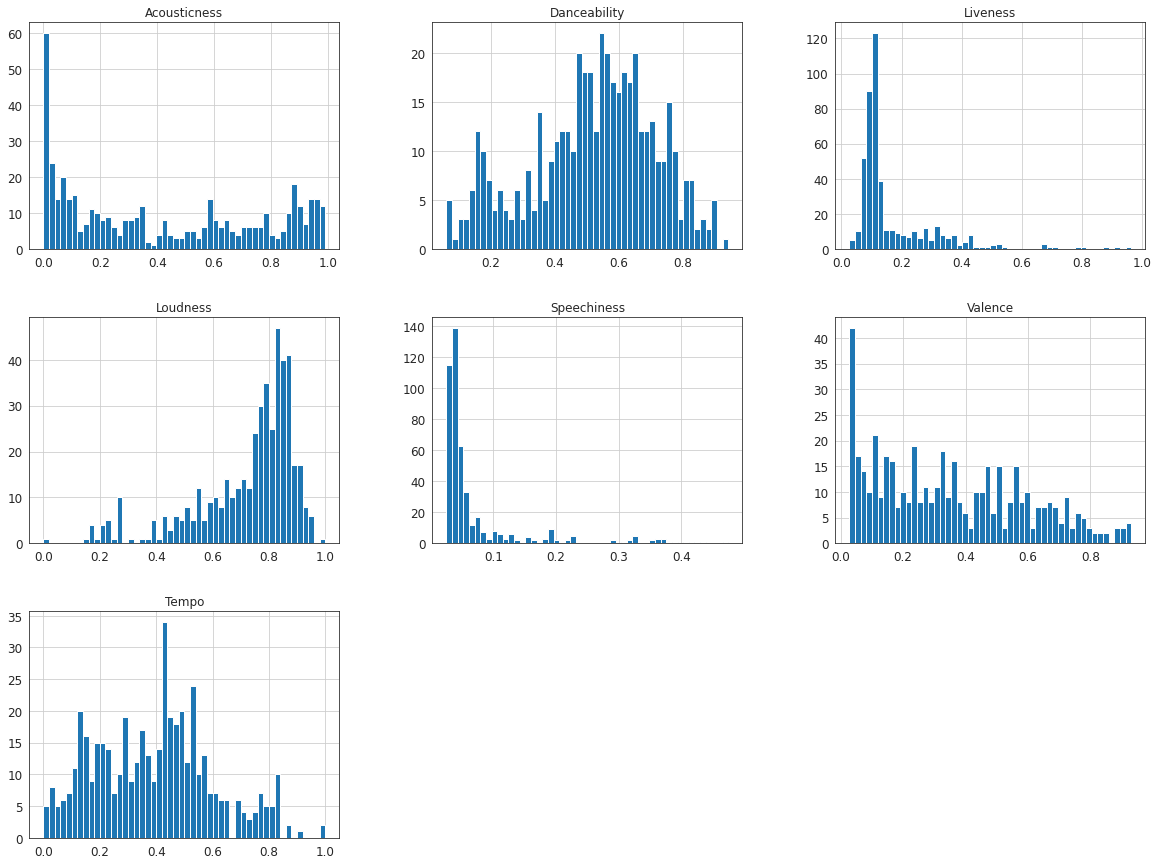

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

songs.hist(bins=50,figsize=(20,15))

In [19]:
song_features = songs.drop(['Song', 'Tempo', ],axis=1)
song_features.head()

,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence
0,0.31700,0.652,0.1040,0.790909,0.0390,0.186
1,0.02960,0.735,0.0678,0.821569,0.1130,0.905
2,0.09790,0.202,0.1090,0.860517,0.0324,0.252
3,0.00959,0.658,0.3250,0.860963,0.0309,0.326
4,0.60400,0.504,0.3640,0.758556,0.0542,0.262


In [20]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(song_features)
    Sum_of_squared_distances.append(km.inertia_)

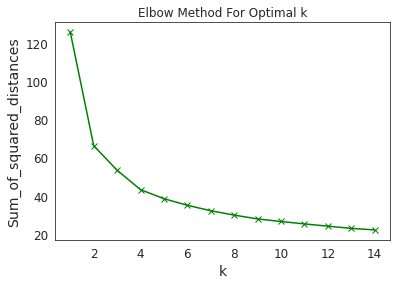

In [21]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(song_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (song_features, preds, metric='euclidean')

plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(song_features)

KMeans(n_clusters=3)

In [23]:
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(song_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(song_features)

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


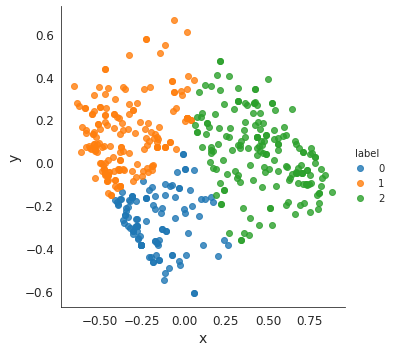

In [24]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [25]:
pca.explained_variance_ratio_

array([0.60989317, 0.19141737])

In [26]:
print(pd.DataFrame(pca.components_,columns=song_features.columns,index = ['PC-1','PC-2']))

      Acousticness  Danceability  Liveness  Loudness  Speechiness   Valence
PC-1      0.780275     -0.308909 -0.083953 -0.346550    -0.060038 -0.406198
PC-2      0.567823      0.451601  0.021941  0.062032     0.040530  0.683858


In [27]:
songs['label'] = y_kmeans

# shuffle dataset
songs = songs.sample(frac=1)
songs['label'].value_counts()

1    179
2    173
0    114
Name: label, dtype: int64

In [28]:
songs[songs['label'] == 0].head(20)

,Song,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence,Tempo,label
12,Moth To A Flame (with The Weeknd),0.002700,0.553,0.1050,0.798633,0.0391,0.1050,0.429246,0
273,Requiem of Silence (Re:Zero),0.482000,0.446,0.1820,0.750891,0.0749,0.1040,0.497594,0
276,Daddy Issues,0.067800,0.588,0.1230,0.734284,0.0329,0.3370,0.190428,0
117,Supermarine,0.102000,0.552,0.0892,0.623351,0.0401,0.1520,0.428322,0
259,Sonnenuntergang im Krapfenwaldlbad,0.446000,0.507,0.1050,0.635859,0.0332,0.0781,0.155340,0
173,Levitate - From The Original Motion Picture “P...,0.030700,0.403,0.1860,0.852674,0.0351,0.2330,0.155279,0
274,Guren (Naruto Shippuden),0.226000,0.527,0.0952,0.603743,0.0552,0.0395,0.190081,0
59,Dream Is Collapsing,0.071100,0.518,0.4200,0.653090,0.0313,0.0892,0.469154,0
339,Moth To A Flame (with The Weeknd),0.002700,0.553,0.1050,0.798633,0.0391,0.1050,0.429246,0
430,Falling in Love at a Coffee Shop,0.200000,0.489,0.1790,0.779679,0.0274,0.2380,0.179858,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5eae12dd0>,
      dtype=object)

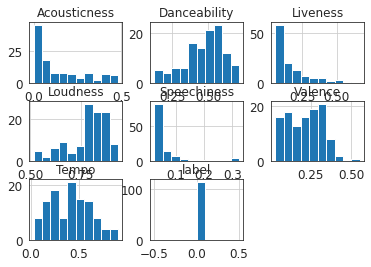

In [29]:
songs[songs['label']==0].hist()

In [ ]:
songs[songs['label']==0].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Acousticness    0.444813
Danceability    0.494287
Liveness        0.158629
Loudness        0.702723
Speechiness     0.075024
Valence         0.324851
Tempo           0.421047
label           0.000000
dtype: float64

In [30]:
songs[songs['label'] == 1].head(20)

,Song,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence,Tempo,label
447,Love The Way You Lie,0.24100,0.749,0.5200,0.865805,0.2270,0.641,0.203866,1
150,Chikatto Chika Chika,0.22200,0.487,0.2950,0.894236,0.2880,0.489,0.195866,1
206,Beqaaboo,0.02210,0.679,0.3510,0.828818,0.0510,0.511,0.455341,1
307,No Love,0.17000,0.707,0.2930,0.842305,0.1900,0.517,0.522574,1
243,if i stay,0.28000,0.843,0.1080,0.671509,0.0492,0.762,0.305854,1
119,Time,0.09950,0.836,0.3350,0.828045,0.0656,0.722,0.353252,1
103,Raanjhanaa,0.11100,0.673,0.0858,0.776441,0.0390,0.780,0.380271,1
345,Love The Way You Lie,0.24100,0.749,0.5200,0.865805,0.2270,0.641,0.203866,1
93,Zara Sa,0.02450,0.739,0.3080,0.864468,0.0472,0.444,0.455620,1
351,Kamikaze,0.15700,0.718,0.1350,0.853951,0.3520,0.786,0.755064,1


In [31]:
songs[songs['label'] == 2].head(20)

,Song,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence,Tempo,label
124,Playing Girev II,0.965,0.353,0.1150,0.163666,0.0420,0.1560,0.456830,2
4,Lust For Life (with The Weeknd),0.604,0.504,0.3640,0.758556,0.0542,0.2620,0.292184,2
413,Love In Slow Motion,0.668,0.485,0.0849,0.854932,0.0253,0.4260,0.038296,2
118,"Harry Potter and the Deathly Hallows, Pt. 2 - ...",0.969,0.530,0.0748,0.403119,0.0390,0.0645,0.494780,2
303,O,0.891,0.440,0.1410,0.740315,0.0531,0.2680,0.767537,2
475,薄暮,0.932,0.150,0.1620,0.546881,0.0381,0.1130,0.250557,2
246,Identity (The Promised Neverland),0.910,0.649,0.3700,0.561141,0.0600,0.1350,0.135927,2
389,Lover Of Mine,0.513,0.422,0.2030,0.734403,0.0359,0.0520,0.373087,2
456,Reckless Lover - Acoustic,0.855,0.633,0.1070,0.706952,0.0301,0.6100,0.369871,2
397,This Love,0.617,0.424,0.0837,0.851070,0.0553,0.3250,0.489315,2


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = song_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [33]:
y_pred = rfc.predict(X_test)

In [51]:
import numpy as np
definitions = ['Happy','Romantic','Sad']
reversefactor = dict(zip(range(4),definitions))
actual = np.vectorize(reversefactor.get)(y_test)
pred = np.vectorize(reversefactor.get)(y_pred)
print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Predicted Mood  Energetic  Romantic  Sad
Actual Mood                             
Energetic              44         2    0
Romantic                0        44    2
Sad                     0         0   62
[[44  2  0]
 [ 0 44  2]
 [ 0  0 62]]


In [37]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [39]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(rfc, open(filename, 'wb'))

In [45]:
df2 = pd.read_json("StreamingHistory2.json", encoding='utf-8')
df2.head()

,endTime,artistName,trackName,msPlayed
0,2022-01-21 23:05,Miura Jam,Lost In Paradise (Jujutsu Kaisen),325500
1,2022-01-21 23:09,DOMINO,U can do it !,257253
2,2022-01-21 23:14,LiSA,炎,275000
3,2022-01-21 23:18,Yung Anime,Unravel,236196
4,2022-01-21 23:21,Hiroyuki Sawano,Call of Silence,178213


In [180]:
song = getAudioFeatures(getAudioID("Lost in Paradise Jujutsu Kaisen"))

In [181]:
acousticness = [song.get('acousticness')]
danceability = [song.get('danceability')]
liveness = [song.get('liveness')]
loudness = [song.get('loudness')]
speechiness = [song.get('speechiness')]
valence = [song.get('valence')]

In [182]:
newSong = pd.DataFrame(list(zip(acousticness, danceability, liveness, loudness, speechiness, valence)), columns=['Acousticness', 'Danceability', 'Liveness', 'Loudness', 'Speechiness', 'Valence'])

In [183]:
y_pred = rfc.predict(newSong)
definitionsSong = ['Energetic','Romantic','Sad']
reversefactorSong = dict(zip(range(4),definitions))
predSong = np.vectorize(reversefactor.get)(y_pred)

In [184]:
predSong

array(['Romantic'], dtype='<U8')

In [81]:
newSong

,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence
0,0.634,0.521,0.103,-10.34,0.0356,0.13


In [82]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model
print(result)

RandomForestClassifier()


In [92]:
stream_df = pd.read_json('StreamingHistory0.json', encoding='utf-8')

stream_df['Play-Time'] = pd.to_datetime(stream_df['endTime'])
stream_df['year'] = pd.DatetimeIndex(stream_df['Play-Time']).year
stream_df['month'] = pd.DatetimeIndex(stream_df['Play-Time']).month
stream_df['day'] = pd.DatetimeIndex(stream_df['Play-Time']).day
stream_df['weekday'] = pd.DatetimeIndex(stream_df['Play-Time']).weekday
stream_df['time'] = pd.DatetimeIndex(stream_df['Play-Time']).time
stream_df['hours'] = pd.DatetimeIndex(stream_df['Play-Time']).hour
stream_df['day-name'] = stream_df['Play-Time'].apply(lambda x: x.day_name())
stream_df['count'] = 1

stream_df['Time-Played (hh-mm-ss)'] = pd.to_timedelta(stream_df['msPlayed'], unit='ms')


def hours(td):
    return td.seconds / 3600


def minutes(td):
    return (td.seconds / 60) % 60


stream_df['Listening Time (Hours)'] = stream_df['Time-Played (hh-mm-ss)'].apply(hours).round(3)
stream_df['Listening Time (Minutes)'] = stream_df['Time-Played (hh-mm-ss)'].apply(minutes).round(3)

stream_df.head()
stream_df.drop(columns=['endTime', "Time-Played (hh-mm-ss)", "msPlayed"], inplace=True)

top_10_songs_count_df = df.groupby(["trackName"])[
    ["Listening Time (Hours)", "Listening Time (Minutes)", "count"]].sum().sort_values(by="count", ascending=False)

In [ ]:
print(top_10_songs_count_df)

In [100]:
top10songs = top_10_songs_count_df[:10].index.tolist()

In [101]:
top10songs

['traitor',
 'You See Big Girl / T:T',
 'Call of Silence',
 'Akuma no Ko',
 'Binary Star',
 'Water Under the Bridge',
 'drivers license',
 'Call Your Name',
 'Cry Baby (Tokyo Revengers)',
 'GATE OF STEINER']

In [ ]:
features = []
for i in top10songs:
    song = getAudioFeatures(getAudioID(i))
    features.append(song)  

from pprint import pprint
pprint(features)

In [107]:
acousticness = []
danceability = []
liveness = []
loudness = []
speechiness = []
valence = []

for i in features:
  acousticness.append(i.get('acousticness'))
  danceability.append(i.get('danceability'))
  liveness.append(i.get('liveness'))
  loudness.append(i.get('loudness'))
  speechiness.append(i.get('speechiness'))
  valence.append(i.get('valence'))

mood10 = pd.DataFrame(list(zip(acousticness, danceability, liveness, loudness, speechiness, valence)), columns=['Acousticness', 'Danceability', 'Liveness', 'Loudness', 'Speechiness', 'Valence',])

arrl = numpy.array(loudness)
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(arrl.reshape(-1,1))
mood10['Loudness'] = pd.DataFrame(loudness_scaled)

mood10.head()

,Acousticness,Danceability,Liveness,Loudness,Speechiness,Valence
0,0.69100,0.380,0.1200,0.568031,0.0338,0.0849
1,0.00756,0.186,0.1280,0.568175,0.0441,0.2270
2,0.64200,0.504,0.0697,0.000000,0.0370,0.0535
3,0.26700,0.561,0.1370,0.800375,0.0473,0.2200
4,0.85500,0.609,0.0948,0.485298,0.0997,0.2010


In [117]:
y_pred = result.predict(mood10)
definitionsSong = ['Energetic','Romantic','Sad']
reversefactorSong = dict(zip(range(4),definitions))
predSong = np.vectorize(reversefactor.get)(y_pred)

print(predSong)

['Sad' 'Energetic' 'Sad' 'Energetic' 'Sad' 'Romantic' 'Sad' 'Romantic'
 'Romantic' 'Energetic']


In [119]:
from collections import Counter
ct = Counter(predSong)
print(ct.most_common(1)[0][0])
print(ct)
# max =
# for i ct.keys():


Sad
Counter({'Sad': 4, 'Energetic': 3, 'Romantic': 3})
